## Observations and Insights 

In [314]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseMetadata = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudy = pd.merge(mouseMetadata, studyResults, on="Mouse ID")

# Display the data table for preview
mouseStudy


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [315]:
# Checking the number of mice.
numMouses = mouseStudy["Mouse ID"].nunique()

numMouses

249

In [316]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouseStudy[mouseStudy.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]

duplicateName = duplicates["Mouse ID"].value_counts()

duplicateName
    



g989    10
Name: Mouse ID, dtype: int64

In [317]:
# Optional: Get all the data for the duplicate mouse ID. 
 mouseStudy[mouseStudy.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [318]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupMouse = mouseStudy.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)

dupMouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [319]:
# Checking the number of mice in the clean DataFrame.
numDupMouses = dupMouse["Mouse ID"].nunique()
numDupMouses

249

In [320]:
drugRegimens = dupMouse["Drug Regimen"].unique()

drugRegimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.\


#Assigning variables
regimenData = dupMouse.groupby("Drug Regimen")

regimenMean = regimenData["Tumor Volume (mm3)"].mean()

regimenMedian = regimenData["Tumor Volume (mm3)"].median()

regimenVar = regimenData["Tumor Volume (mm3)"].var()

regimenStd = regimenData["Tumor Volume (mm3)"].std()

regimenSem = regimenData["Tumor Volume (mm3)"].sem()
#Making summary stats table
regimenAnalysis = pd.DataFrame({"Mean": regimenMean, "Median": regimenMedian, "Variance": regimenVar,
                                "Standard Deviation": regimenStd, "SEM": regimenSem })

regimenAnalysis





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [322]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimenData.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

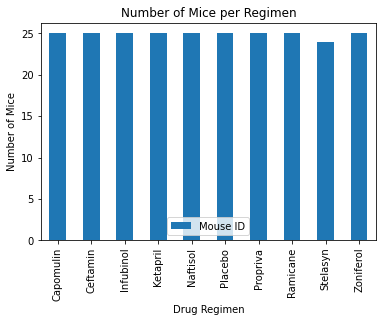

In [323]:
# Generate a bar plot showing the total number of unique mice taken on each drug regimen using pandas.
regimenMice = regimenData["Mouse ID"].nunique()

regimenMiceDf = pd.DataFrame(regimenMice)

regimenChart = regimenMiceDf.plot(kind="bar", title="Number of Mice per Regimen")
regimenChart.set_xlabel("Drug Regimen")
regimenChart.set_ylabel("Number of Mice")





Text(0, 0.5, 'Number of Mice')

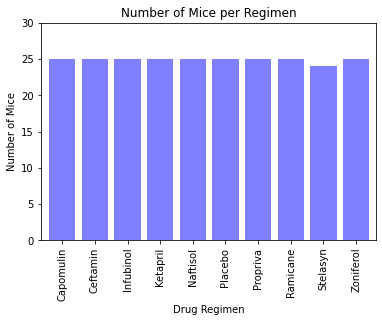

In [324]:
# Generate a bar plot showing the total number of unique mice taken on each drug regimen using pyplot.

x_axis = np.arange(len(regimenMice))

drugRegimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
               "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]


tick_locations = [value+0.4 for value in x_axis]

plt.bar(x_axis, regimenMice, color='b', alpha=0.5, align="edge")

plt.xticks(tick_locations, drugRegimens, rotation="vertical")

plt.xlim(-0.25, len(x_axis))

plt.ylim(0, max(regimenMice)+5)

plt.title("Number of Mice per Regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Mice")




Text(17.200000000000003, 0.5, 'Percentage')

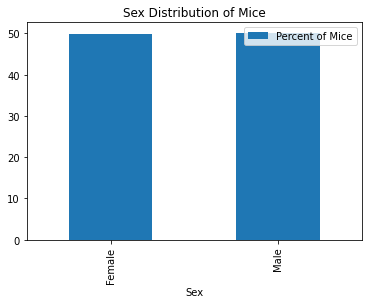

In [232]:
# Generate a bar plot showing the distribution of female versus male mice using pandas
sexData = dupMouse.groupby("Sex")

sexTotal = sexData["Mouse ID"].nunique()

sexPercent = sexTotal/numDupMouses * 100

sexDist = pd.DataFrame({"Percent of Mice": sexPercent })


sexChart = sexDist.plot(kind="bar", title="Sex Distribution of Mice")
regimenChart.set_xlabel("Sex")
regimenChart.set_ylabel("Percentage")








Text(0, 0.5, 'Percentage')

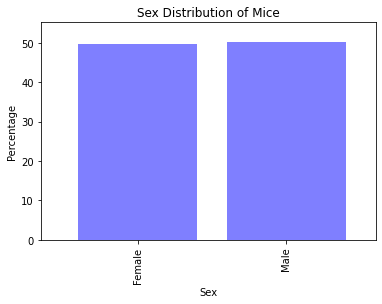

In [233]:
# Generate a bar plot showing the distribution of female versus male mice using pyplot
xAxis = np.arange(len(sexPercent))

sexes = ["Female", "Male"]

tick_locations = [value+0.4 for value in xAxis]

plt.bar(xAxis, sexPercent, color='b', alpha=0.5, align="edge")

plt.xticks(tick_locations, sexes, rotation="vertical")

plt.xlim(-0.25, len(xAxis))

plt.ylim(0, max(sexPercent)+ 5)

plt.title("Sex Distribution of Mice")

plt.xlabel("Sex")

plt.ylabel("Percentage")

## Quartiles, Outliers and Boxplots

In [242]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalSort = dupMouse.groupby(['Mouse ID'])

finalTime = finalSort["Timepoint"].max()

timeDf = pd.DataFrame({"Final Timepoint": finalTime})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalDf = pd.merge(dupMouse, timeDf, on="Mouse ID")

finalWeightDf = finalDf.loc[finalDf["Timepoint"] == (finalDf["Final Timepoint"]), [
    "Mouse ID", "Drug Regimen", "Timepoint", "Weight (g)", "Tumor Volume (mm3)"]]

combinedDf = finalWeightDf.loc[(finalWeightDf["Drug Regimen"] == "Capomulin") | (finalWeightDf["Drug Regimen"] == "Ramicane")
                               | (finalWeightDf["Drug Regimen"] == "Infubinol") | (finalWeightDf["Drug Regimen"] == "Ceftamin"),
                               ["Mouse ID", "Drug Regimen", "Timepoint", "Weight (g)", "Tumor Volume (mm3)"]]


#Making sorted dataframes to help with finding ranges later
capDf = finalWeightDf.loc[(finalWeightDf["Drug Regimen"] == "Capomulin"),
                                ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

ramDf = finalWeightDf.loc[(finalWeightDf["Drug Regimen"] == "Ramicane"),
                                ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

infDf = finalWeightDf.loc[(finalWeightDf["Drug Regimen"] == "Infubinol"),
                                ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

cefDf = finalWeightDf.loc[(finalWeightDf["Drug Regimen"] == "Ceftamin"),
                                ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]





,Mouse ID,Drug Regimen,Timepoint,Weight (g),Tumor Volume (mm3)
9,k403,Ramicane,45,16,22.050126
19,s185,Capomulin,45,17,23.343598
29,x401,Capomulin,45,15,28.484033
39,m601,Capomulin,45,17,28.430964
49,g791,Ramicane,45,16,29.128472
...,...,...,...,...,...
1787,x822,Ceftamin,45,29,61.386660
1803,y163,Infubinol,45,27,67.685569
1835,y769,Ceftamin,45,27,68.594745
1845,y865,Ceftamin,45,26,64.729837


In [325]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin summary stats
capQuartiles = capDf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capLowerq = capQuartiles[0.25]
capUpperq = capQuartiles[0.75]
capMedian = capQuartiles[0.5]
capIqr = capUpperq - capLowerq
capLowBound = capLowerq - (1.5*capIqr)
capUpBound = capUpperq + (1.5*capIqr)
#Ramicane summary stats
ramQuartiles = ramDf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramLowerq = ramQuartiles[0.25]
ramUpperq = ramQuartiles[0.75]
ramMedian = ramQuartiles[0.5]
ramIqr = ramUpperq - ramLowerq
ramLowBound = ramLowerq - (1.5*ramIqr)
ramUpBound = ramUpperq + (1.5*ramIqr)
#Infubinol summary stats
infQuartiles = infDf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infLowerq = infQuartiles[0.25]
infUpperq = infQuartiles[0.75]
infMedian = infQuartiles[0.5]
infIqr = infUpperq - infLowerq
infLowBound = infLowerq - (1.5*infIqr)
infUpBound = infUpperq + (1.5*infIqr)
#Ceftamin Summary Stats
cefQuartiles = cefDf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cefLowerq = cefQuartiles[0.25]
cefUpperq = cefQuartiles[0.75]
cefMedian = cefQuartiles[0.5]
cefIqr = cefUpperq - cefLowerq
cefLowBound = cefLowerq - (1.5*cefIqr)
cefUpBound = cefUpperq + (1.5*cefIqr)
    
print(f"The lower quartile of Tumor Volume is; Capomulin: {capLowerq} Ramicane: {ramLowerq} Infubinol: {infLowerq} Ceftamin: {cefLowerq}")
print(f"The upper quartile of Tumor Volume is; Capomulin: {capUpperq} Ramicane: {ramUpperq} Infubinol: {infUpperq} Ceftamin: {cefUpperq}")
print(f"The the median of Tumor Volume is;  Capomulin: {capMedian} Ramicane: {ramMedian} Infubinol: {infMedian} Ceftamin: {cefMedian}")
print(f"The interquartile range of Tumor Volume is; Capomulin: {capIqr} Ramicane: {ramIqr} Infubinol: {infIqr} Ceftamin: {cefIqr}")
print(f"Values below this bound could be outliers; Capomulin: {capLowBound} Ramicane: {ramLowBound} Infubinol: {infLowBound} Ceftamin: {cefLowBound}")
print(f"Values above this bound could be outliers; Capomulin: {capUpBound} Ramicane: {ramUpBound} Infubinol: {infUpBound} Ceftamin: {cefUpBound}")
    

The lower quartile of Tumor Volume is; Capomulin: 32.37735684 Ramicane: 31.56046955 Infubinol: 54.04860769 Ceftamin: 48.72207785
The upper quartile of Tumor Volume is; Capomulin: 40.1592203 Ramicane: 40.65900627 Infubinol: 65.52574285 Ceftamin: 64.29983003
The the median of Tumor Volume is;  Capomulin: 38.125164399999996 Ramicane: 36.56165229 Infubinol: 60.16518046 Ceftamin: 59.85195552
The interquartile range of Tumor Volume is; Capomulin: 7.781863460000004 Ramicane: 9.098536719999998 Infubinol: 11.477135160000003 Ceftamin: 15.577752179999997
Values below this bound could be outliers; Capomulin: 20.70456164999999 Ramicane: 17.912664470000003 Infubinol: 36.83290494999999 Ceftamin: 25.355449580000002
Values above this bound could be outliers; Capomulin: 51.83201549 Ramicane: 54.30681135 Infubinol: 82.74144559000001 Ceftamin: 87.66645829999999


In [236]:
#Retrieving any Capomulin data outliers
capOutliers = capDf.loc[(capDf["Tumor Volume (mm3)"] > capUpBound) | (capDf["Tumor Volume (mm3)"] < capLowBound),
                       ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
capOutliers

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


In [237]:
#Retrieving any Ramicane data outliers
ramOutliers = ramDf.loc[(ramDf["Tumor Volume (mm3)"] > ramUpBound) | (ramDf["Tumor Volume (mm3)"] < ramLowBound),
                       ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
ramOutliers

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


In [238]:
#Retrieving any Infubinol data outliers
infOutliers = infDf.loc[(infDf["Tumor Volume (mm3)"] > infUpBound) | (infDf["Tumor Volume (mm3)"] < infLowBound),
                       ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
infOutliers

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
669,c326,Infubinol,5,36.321346


In [239]:
#Retrieving any Ceftamin data outliers
cefOutliers = cefDf.loc[(cefDf["Tumor Volume (mm3)"] > cefUpBound) | (cefDf["Tumor Volume (mm3)"] < cefLowBound),
                       ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
cefOutliers

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


Text(0.5, 1.0, 'Tumor Volume by Drug Regimen')

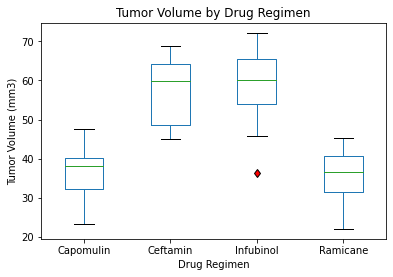

In [259]:
#Setting outlier styling
redDiamond = dict(markerfacecolor='r', marker='d')
#Making boxplot
combinedPlot = combinedDf.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False, flierprops=redDiamond)

plt.suptitle("")
combinedPlot.set_xlabel("Drug Regimen")
combinedPlot.set_ylabel("Tumor Volume (mm3)")
combinedPlot.set_title("Tumor Volume by Drug Regimen")



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

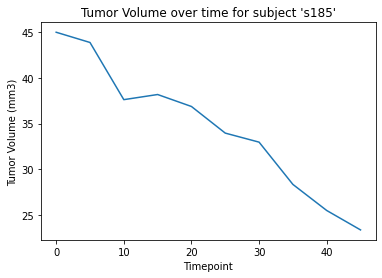

In [300]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Getting only mice treated with Capomulin. Didn't use capDf because I needed all timepoints
capMiceDf = dupMouse.loc[dupMouse["Drug Regimen"] == "Capomulin"]
#Singling out a single mouse
capMouseDf = capMiceDf.loc[capMiceDf["Mouse ID"] == "s185"]

plt.plot(capMouseDf["Timepoint"], capMouseDf["Tumor Volume (mm3)"] )

plt.title("Tumor Volume over time for subject 's185'")

plt.xlabel("Timepoint")

plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

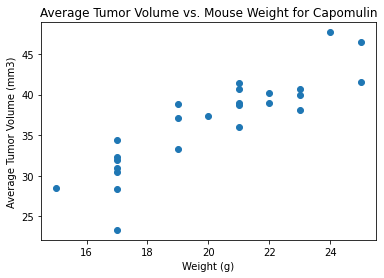

In [303]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorDf = capMiceDf.groupby(["Mouse ID"])

avgTumor = tumorDf["Tumor Volume (mm3)"].mean()

avgTumorDf = pd.DataFrame({"Average Tumor Volume (mm3)": avgTumor})

capAvgDf = pd.merge(capMiceDf, avgTumorDf, on="Mouse ID")

capAvgTumor = capAvgDf.drop_duplicates(subset=['Mouse ID'], keep = 'last')

plt.scatter(capAvgTumor.iloc[:,4],capAvgTumor.iloc[:,6])

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")




## Correlation and Regression

The correlation between Weight and Average Tumor Volume is 0.88
The r-squared is: 0.7686134812139
The linear equation is: y = 1.75x + 1.45


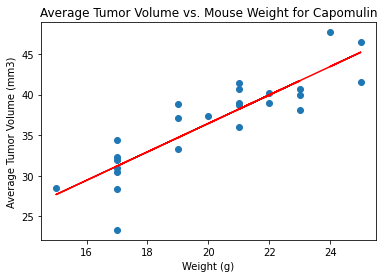

In [313]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Getting the correlation coefficent
correlation = st.pearsonr(capAvgTumor.iloc[:,4],capAvgTumor.iloc[:,6])

print(f"The correlation between Weight and Average Tumor Volume is {round(correlation[0],2)}")
#Adding the line of regression to the data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capAvgTumor.iloc[:,4],capAvgTumor.iloc[:,6])

regressValues = (capAvgTumor.iloc[:,4]) * slope + intercept

lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capAvgTumor.iloc[:,4],capAvgTumor.iloc[:,6])

plt.plot((capAvgTumor.iloc[:,4]),regressValues,"r-")

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {lineEq}")

plt.show()


